# Autoencoder Image Retrieval 

Image retrieval using a simple autoencoder on CIFAR-10 dataset.

**Problem**: take 1000 images from CIFAR10. Then, given a pair of images from CIFAR10 x1 and x2, build a network that can return both images given their average (x1+x2)/2 as the only input.

In [46]:
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt

## Data Cleaning and Sampling

In [52]:
(X_train, _), (X_test, _) = cifar10.load_data()

In [53]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(len(X_test), X_test.shape[1], X_test.shape[2], 3)

In [54]:
X_train.shape

(50000, 32, 32, 3)

We create two sets of images. Every set has 1000 images.

In [56]:
image_set1 = X_train[:1000]
image_set2 = X_train[1000:2000]

## Visualizing The Problem

Output image_1

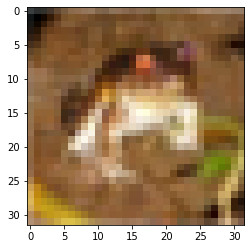

In [19]:
plt.imshow(image_set1[0])
plt.show()

Output image_2

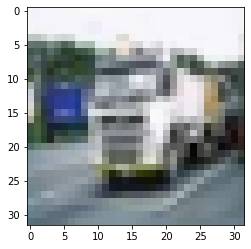

In [18]:
plt.imshow(image_set2[0])
plt.show()

Averaged image as input

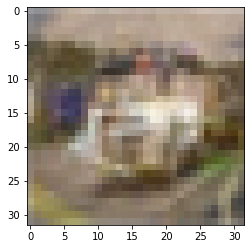

In [57]:
plt.imshow((image_set1[0] + image_set2[0]) / 2)
plt.show()

Creating averaged images as the input set

In [58]:
input_image_set = (image_set1 + image_set2) / 2

## Modeling
We use a simple autoencoder

In [59]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# Decoder1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Decoder2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [60]:
autoencoder = Model(input_img, [decoded, decoded2])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 32, 32, 16)   448         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 16, 16, 16)  0           ['conv2d_30[0][0]']              
                                                                                                  
 conv2d_31 (Conv2D)             (None, 16, 16, 8)    1160        ['max_pooling2d_6[0][0]']        
                                                                                            

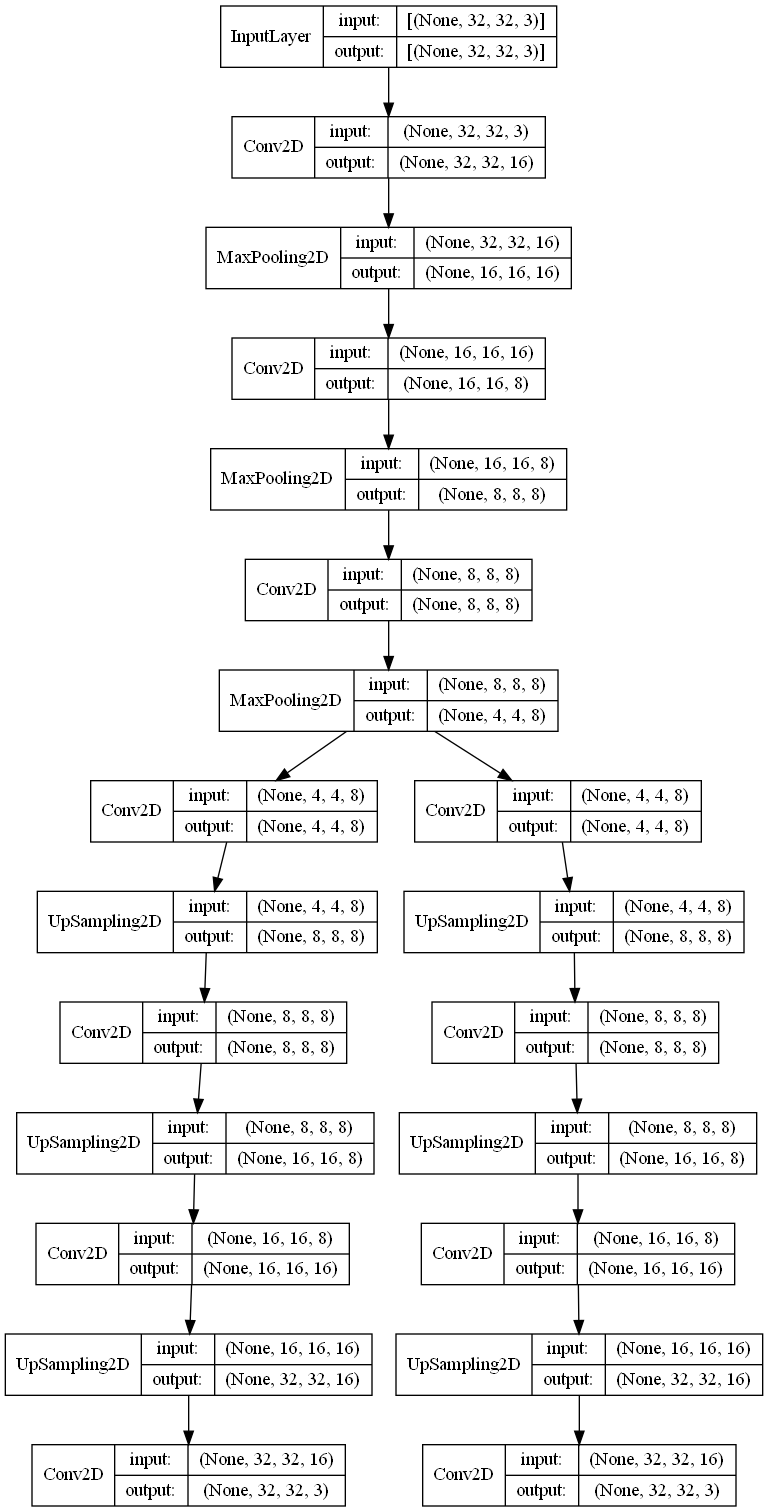

In [61]:
from keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=False)

Creating validation data

In [67]:
X_test1 = X_test[:500]
X_test2 = X_test[500:1000]

In [68]:
input_test = (X_test1 + X_test2) / 2

Training the model

In [70]:
history = autoencoder.fit(input_image_set, [image_set1, image_set2], epochs=50, batch_size=256, 
                          validation_data=(input_test, [X_test1, X_test2]))

Epoch 1/50
4/4 [==============================] - 2s 486ms/step - loss: 0.1207 - conv2d_36_loss: 0.0617 - conv2d_40_loss: 0.0590 - val_loss: 0.1196 - val_conv2d_36_loss: 0.0626 - val_conv2d_40_loss: 0.0570
Epoch 2/50
4/4 [==============================] - 2s 514ms/step - loss: 0.1177 - conv2d_36_loss: 0.0607 - conv2d_40_loss: 0.0570 - val_loss: 0.1165 - val_conv2d_36_loss: 0.0611 - val_conv2d_40_loss: 0.0554
Epoch 3/50
4/4 [==============================] - 2s 455ms/step - loss: 0.1146 - conv2d_36_loss: 0.0593 - conv2d_40_loss: 0.0554 - val_loss: 0.1131 - val_conv2d_36_loss: 0.0590 - val_conv2d_40_loss: 0.0541
Epoch 4/50
4/4 [==============================] - 2s 459ms/step - loss: 0.1109 - conv2d_36_loss: 0.0572 - conv2d_40_loss: 0.0537 - val_loss: 0.1086 - val_conv2d_36_loss: 0.0563 - val_conv2d_40_loss: 0.0523
Epoch 5/50
4/4 [==============================] - 2s 462ms/step - loss: 0.1072 - conv2d_36_loss: 0.0550 - conv2d_40_loss: 0.0522 - val_loss: 0.1050 - val_conv2d_36_loss: 0.0539

Epoch 41/50
4/4 [==============================] - 2s 509ms/step - loss: 0.0882 - conv2d_36_loss: 0.0443 - conv2d_40_loss: 0.0439 - val_loss: 0.0885 - val_conv2d_36_loss: 0.0446 - val_conv2d_40_loss: 0.0440
Epoch 42/50
4/4 [==============================] - 2s 508ms/step - loss: 0.0878 - conv2d_36_loss: 0.0440 - conv2d_40_loss: 0.0438 - val_loss: 0.0889 - val_conv2d_36_loss: 0.0451 - val_conv2d_40_loss: 0.0438
Epoch 43/50
4/4 [==============================] - 2s 509ms/step - loss: 0.0875 - conv2d_36_loss: 0.0440 - conv2d_40_loss: 0.0434 - val_loss: 0.0880 - val_conv2d_36_loss: 0.0444 - val_conv2d_40_loss: 0.0435
Epoch 44/50
4/4 [==============================] - 2s 649ms/step - loss: 0.0872 - conv2d_36_loss: 0.0438 - conv2d_40_loss: 0.0434 - val_loss: 0.0882 - val_conv2d_36_loss: 0.0447 - val_conv2d_40_loss: 0.0435
Epoch 45/50
4/4 [==============================] - 2s 499ms/step - loss: 0.0871 - conv2d_36_loss: 0.0438 - conv2d_40_loss: 0.0433 - val_loss: 0.0878 - val_conv2d_36_loss: 0

## Evaluation

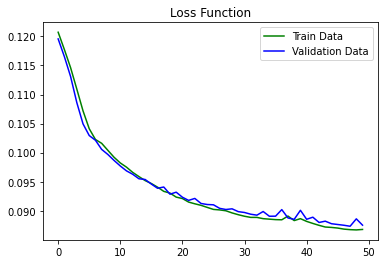

In [71]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')
plt.title('Loss Function')
plt.legend()
plt.show()